# Transformers in NLP

Recurrent Neural Networks (RNNs) find primary application in tasks involving sequential data, where both the input and output follow a defined order. Major use cases for recurrent networks include language translation and modeling time series data.


In the context of language translation (e.g., English sentence into French), a common approach is to use a sequence-to-sequence model with an encoder-decoder architecture based on RNNs. Here's a simplified overview of how it works:

- Encoder: The input sentence in the source language is fed into the encoder RNN, which processes the input sequence one token at a time and maintains hidden states capturing information from the input.

- Context Vector: The final hidden state of the encoder serves as a context vector that summarizes the input sequence.

- Decoder: The decoder RNN takes the context vector and generates the output sequence in the target language one token at a time. The hidden states of the decoder RNN capture the context and generate the translation step by step.


Problem: RNNs are slow.
Solution: Transformers. 


But the problem with RNNs is that they are slow! So, it's important to note that more modern architectures, such as the Transformer model, are better for this task. Transformers are able to capture long-range dependencies more effectively and can be parallelized, making them computationally efficient.

- Transformers have two main blocs: encoder and decoder, each one having a self-attention mechanism.

## Preprocessing:
(1) **Embedding of the input data:** the generation of the embeddings of the input sentence (without paying attention to their relationship in the sentence)
(2) **Positional encoding:** the computation of the positional vector of each word in the input sentence (The tokenization task discards any notion of relations that existed in the input sentence. The positional encoding tries to create the original cyclic nature by generating a context vector for each word)

## Encoder:
For each word, we get two vectors: (1) the embedding and (2) its context vector. These vectors are added to create a single vector for each word, which is then transmitted to the encoder.

(1) **Multi-head attention:** So far, we lost all notions of a relationship. The goal of the attention layer is to capture the contextual relationships existing between different words in the input sentence. This step ends up generating an attention vector for each word.

(2) **Position-wise feed-forward net (FFN):** At this stage, a feed-forward neural network is applied to every attention vector to transform them into a format that is expected by the next multi-head attention layer in the decoder.

## Decoder:

The decoder block consists of three main layers: (1) masked multi-head attention, (2) multi-head attention, and (3) position-wise feed-forward network. The last two layers are the same in the encoder.

The decoder comes into the equation during the training of the network, and it receives two main inputs: (1) the attention vectors of the input sentence we want to translate and (2) the translated target sentences in English.

(1)  **masked multi-head attention layer**
the network only has to access the previous words. The masked multi-head attention layer masks those next words by transforming them into zeros so that they can’t be used by the attention network.

The result of the masked multi-head attention layer passes through the rest of the layers in order to predict the next word by generating a probability score.



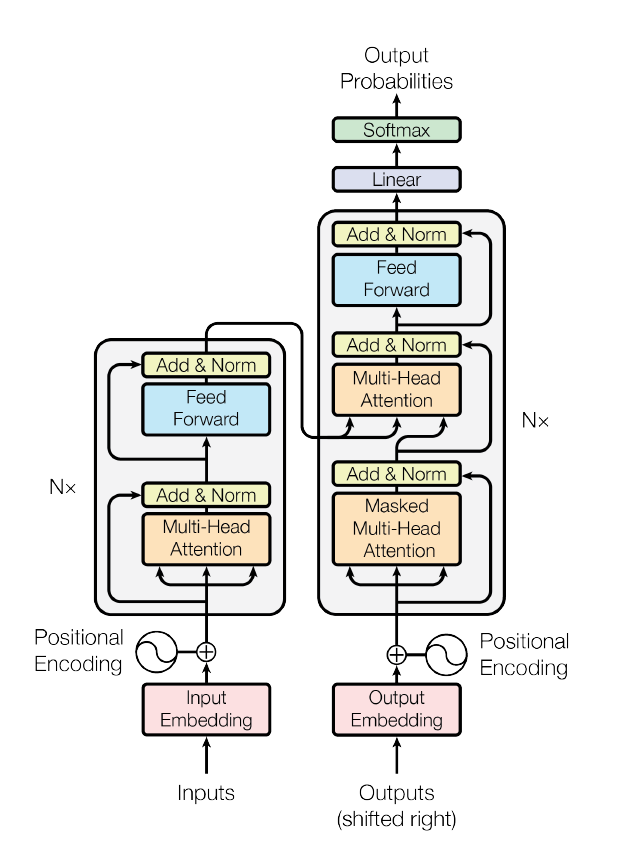

## Transfer Learning
Transformers have versatile applications, spanning tasks like sentence translation, sentiment analysis, and question answering. Instead of undergoing the complexities of training transformers from scratch each time, a more efficient approach is to leverage pre-trained deep neural networks as a foundation for building new models.

This reuse process entails selecting a pre-trained model that aligns with your specific use case, fine-tuning the input-output pairs with data relevant to your target task, and retraining the top layers of the pre-existing model using your dataset. This approach is referred to as transfer learning.

But how can we find these pre-existing models? 


## Answer is Hugging Face
Hugging Face, established in 2016 by Julien Chaumond, Clément Delangue, and Thomas Wolf, stands as a pivotal AI community and machine-learning platform. At its core, Hugging Face endeavors to democratize Natural Language Processing (NLP) by granting Data Scientists, AI practitioners, and Engineers instant access to a vast repository comprising over 20,000 pre-trained models. These models, predominantly built upon the state-of-the-art transformer architecture, cover a spectrum of NLP tasks, offering a valuable resource for researchers and practitioners seeking efficient solutions for tasks such as text classification, translation, summarization, and more. By fostering an open and collaborative environment, Hugging Face has become a go-to hub for the exploration, utilization, and sharing of cutting-edge models, empowering the broader community in the field of machine learning.


## Our aim:
In the course of this project, we leveraged Hugging Face Transformers to execute a range of tasks, including language translation, zero-shot classification, sentiment analysis, and question answering.

In [1]:
# Install required packages
# !pip install transformers sentencepiece
# !pip install torch
# !pip install pandas
# !pip install pipeline

In [1]:
# Install libraries
# from transformers import pipeline
import pandas as pd
from transformers import MarianTokenizer, MarianMTModel
import sentencepiece
from transformers import pipeline

# Language Translation


MariamMT stands as a highly effective Machine Translation framework designed for translation models, leveraging identical models as BART.

Link: https://huggingface.co/docs/transformers/model_doc/marian

In [2]:
# Translation:  english to french
from transformers import MarianTokenizer, MarianMTModel
model_name = 'Helsinki-NLP/opus-mt-en-fr'

# Get the tokenizer
tokenizer = MarianTokenizer.from_pretrained(model_name)
# Instantiate the model
model = MarianMTModel.from_pretrained(model_name)

/Users/burcuozek/opt/anaconda3/envs/burcu/lib/python3.8/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [3]:
src_text = ["Life is good.", "Hi everyone?", "How are you?","Yay, I did it!"]

model_name = 'Helsinki-NLP/opus-mt-en-fr'

model = MarianMTModel.from_pretrained(model_name)
translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))
[tokenizer.decode(t, skip_special_tokens=True) for t in translated]

['La vie est bonne.',
 'Bonjour tout le monde?',
 'Comment allez-vous?',
 "Ouais, je l'ai fait!"]

# Zero-shot classification


Zero-shot classification refers to a machine learning or artificial intelligence task where a model is trained to categorize or classify input data into predefined classes, even though it has never seen examples from those classes during training. In traditional classification tasks, models are trained on labeled data containing examples from each class they are expected to recognize. However, in zero-shot classification, the model is expected to generalize to new classes that were not part of its training set.

This is achieved by providing the model with information about the new classes during training, often in the form of textual descriptions or other auxiliary data. The model learns to associate these descriptions with the corresponding classes and can then make predictions on examples from these unseen classes during inference.

Zero-shot classification is particularly useful in scenarios where obtaining labeled data for all possible classes is impractical or costly. It showcases the model's ability to generalize and transfer knowledge to novel classes based on the information it has received about them during training.

Yin et al. proposed a method for using pre-trained NLI models as a ready-made zero-shot sequence classifier. The method works by posing the sequence to be classified as the NLI premise and constructing a hypothesis from each candidate label. For example, if we want to evaluate whether a sequence belongs to the class "politics", we could construct a hypothesis that This text is about politics. The probabilities for entailment and contradiction are then converted to label probabilities.

Link: https://huggingface.co/facebook/bart-large-mnli


In [4]:
from transformers import pipeline

In [5]:
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [6]:
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938651919364929, 0.0032738035079091787, 0.002861031796783209]}

In [7]:
sequence_to_classify = "Ankara is the capital of Turkey"
# we can specify candidate labels in Russian or any other language above:
candidate_labels = ["Politics", "Geography", "Science"]
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'Ankara is the capital of Turkey',
 'labels': ['Geography', 'Politics', 'Science'],
 'scores': [0.6661186218261719, 0.22976505756378174, 0.1041162982583046]}

# Sentiment analysis


Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that involves determining the sentiment expressed in a piece of text. The goal of sentiment analysis is to identify and extract subjective information from textual data, and to categorize the sentiment conveyed as positive, negative, or neutral.

The corresponding model is a distilled BERT base model. 

Link: https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

In [8]:
model_checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

distil_bert_model = pipeline(task="sentiment-analysis", model=model_checkpoint)

In [9]:
english_texts = ["Life is good.", "Oh! No! I am so sad","Yay, I did it!", "That is perfect."]

In [10]:
# Run the predictions
distil_bert_model(english_texts[0:])

[{'label': 'POSITIVE', 'score': 0.9998745918273926},
 {'label': 'NEGATIVE', 'score': 0.9988569021224976},
 {'label': 'POSITIVE', 'score': 0.9965762495994568},
 {'label': 'POSITIVE', 'score': 0.9998670816421509}]

# Question Answering


Question answering (QA) is a natural language processing (NLP) task that involves designing systems or models capable of providing human-like responses to user queries posed in natural language. The goal of QA systems is to understand the intent of the question and generate accurate and relevant answers from a given knowledge base or corpus.

Let's say that there is an event in Boston to see the Christmas Lights. It is in Stone Zoo, and we want to learn the date of this event. 
Instead of reading the whole report to find the key information, we can use a question-answering model from Hugging Face that will provide the answer we are interested in. 

Link: https://huggingface.co/deepset/roberta-base-squad2

In [11]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

In [12]:
model_checkpoint = "deepset/roberta-base-squad2"

task = 'question-answering'
QA_model = pipeline(task, model=model_checkpoint, tokenizer=model_checkpoint)

In [13]:
english_texts = ["Stone Zoo features tree-lined paths adorned with twinkling lights.",
                 "Take a delightful stroll through the festively decorated Creek.",
                 "The event takes place from November 24 to December 31."]


# Concatenate the list of strings into a single string
context = ' '.join(english_texts)

In [16]:
QA_input = {
          'question': 'When does the Lights Event take place at Stone Zoo?',
          'context': context
          }

In [17]:
model_response = QA_model(QA_input)
pd.DataFrame([model_response])

,score,start,end,answer
0,0.748068,158,184,November 24 to December 31


References:
- https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=683184495563&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9002007&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-us_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-dec23&gad_source=1&gclid=CjwKCAiAvoqsBhB9EiwA9XTWGaF9zmUYgdDaR1sVrX6gwZboGV0mzbPkiSedozlj-pvtWmEz6ynCxxoCp3IQAvD_BwE